In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

import sys
sys.path.append('../../src/')
from namelist import *

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

In [25]:
filepath = 'D:/data/Graduation/Contribution/RandomForest_output/'
df = pd.read_excel(filepath + 'RF_PRD_forbar.xlsx', index_col=0,header=[0])
df

,low_all,low_diurnal,low_nocturnal,high_all,high_diurnal,high_nocturnal,diff_all,diff_diurnal,diff_nocturnal
SFC_TMP,0.354379,0.337177,0.115345,0.207883,0.350959,0.138281,0.131054,0.074602,0.200411
SOL_RAD,0.253978,0.110789,0.027982,0.410314,0.152822,0.016333,0.096511,0.090719,0.021609
RH,0.124206,0.147821,0.339176,0.112121,0.078406,0.322481,0.132651,0.117224,0.190976
PRES,0.041379,0.047169,0.098333,0.047976,0.048414,0.129243,0.153178,0.136160,0.163934
WSPD10,0.097416,0.131883,0.183409,0.072814,0.145901,0.127850,0.186521,0.229154,0.136101
WDIR10,0.066827,0.159575,0.095975,0.093074,0.173997,0.112423,0.185762,0.244760,0.126997
CloudFRAC,0.061814,0.065585,0.139780,0.055818,0.049501,0.153388,0.114322,0.107381,0.159971
mse,455.557984,468.713433,354.429456,363.551495,475.464899,388.672913,564.646222,605.149757,357.957841
r2,0.820165,0.658016,0.715748,0.826938,0.704583,0.644609,0.673721,0.666312,0.751692


In [26]:
variants = ['SFC_TMP', 'SOL_RAD', 'RH', 'PRES',
            'WSPD10', 'WDIR10', 'CloudFRAC']

df = df.loc[variants]

In [13]:
# 设置各要素对应的颜色
factor_color = {
    'SFC_TMP'  : '#ffbe7a',
    'SOL_RAD'  : '#e88482',
    'RH'       : '#82b0d2',
    'PRES'     : '#beb8dc',
    'WSPD10'   : '#45917c',
    'WDIR10'   : '#799a87',
    'CloudFRAC': '#c5b9a5'
}
custom_colors = [factor_color[factor] for factor in variants]

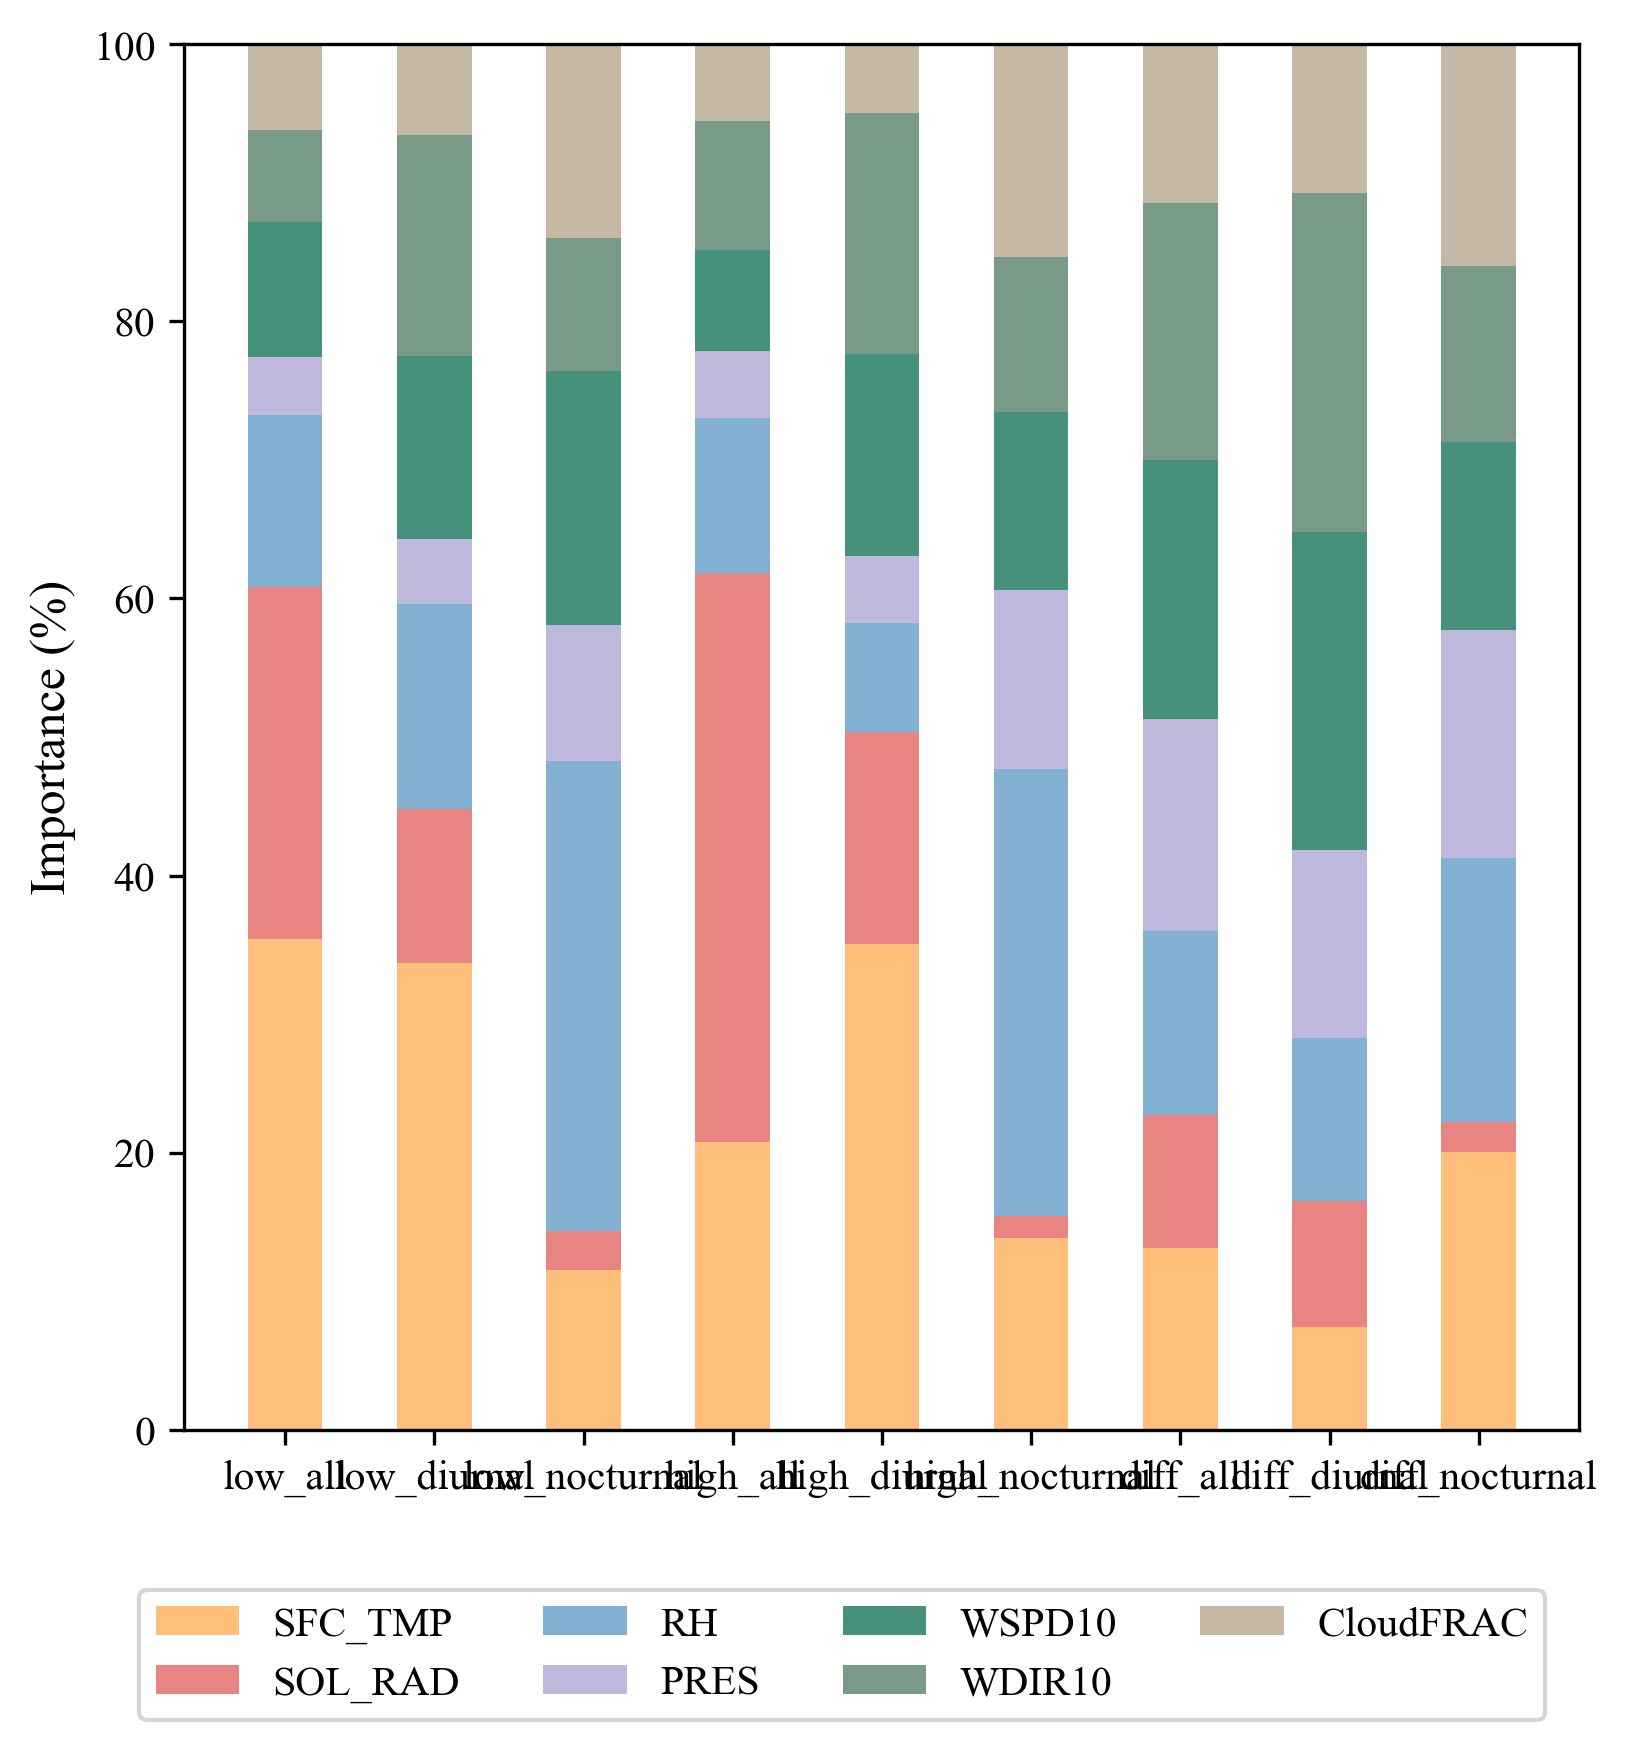

In [27]:
fig = plt.figure(figsize=(6, 6),dpi=300)
ax = fig.subplots(1,1)

col = df.columns
bottom = np.zeros(len(col))
for var in variants:
    ax.bar(col, df.loc[var], label=var, bottom=bottom, color=factor_color[var],width=0.5,)
    bottom += df.loc[var]

ax.set_ylim(0,1)
ax.set_yticks(np.arange(0,1.1,0.2))
ax.set_yticklabels(np.arange(0,110,20))
ax.set_ylabel('Importance (%)',fontsize=12)
# ax.set_xlabel('Categories')
ax.legend(bbox_to_anchor=(0.99, -0.1),ncol=4)

plt.show()

In [63]:
low = df.iloc[:,:3]
low.columns = ['All','Daytime','Nighttime']
high = df.iloc[:,3:6]
high.columns = ['All','Daytime','Nighttime']
diff = df.iloc[:,6:]
diff.columns = ['All','Daytime','Nighttime']

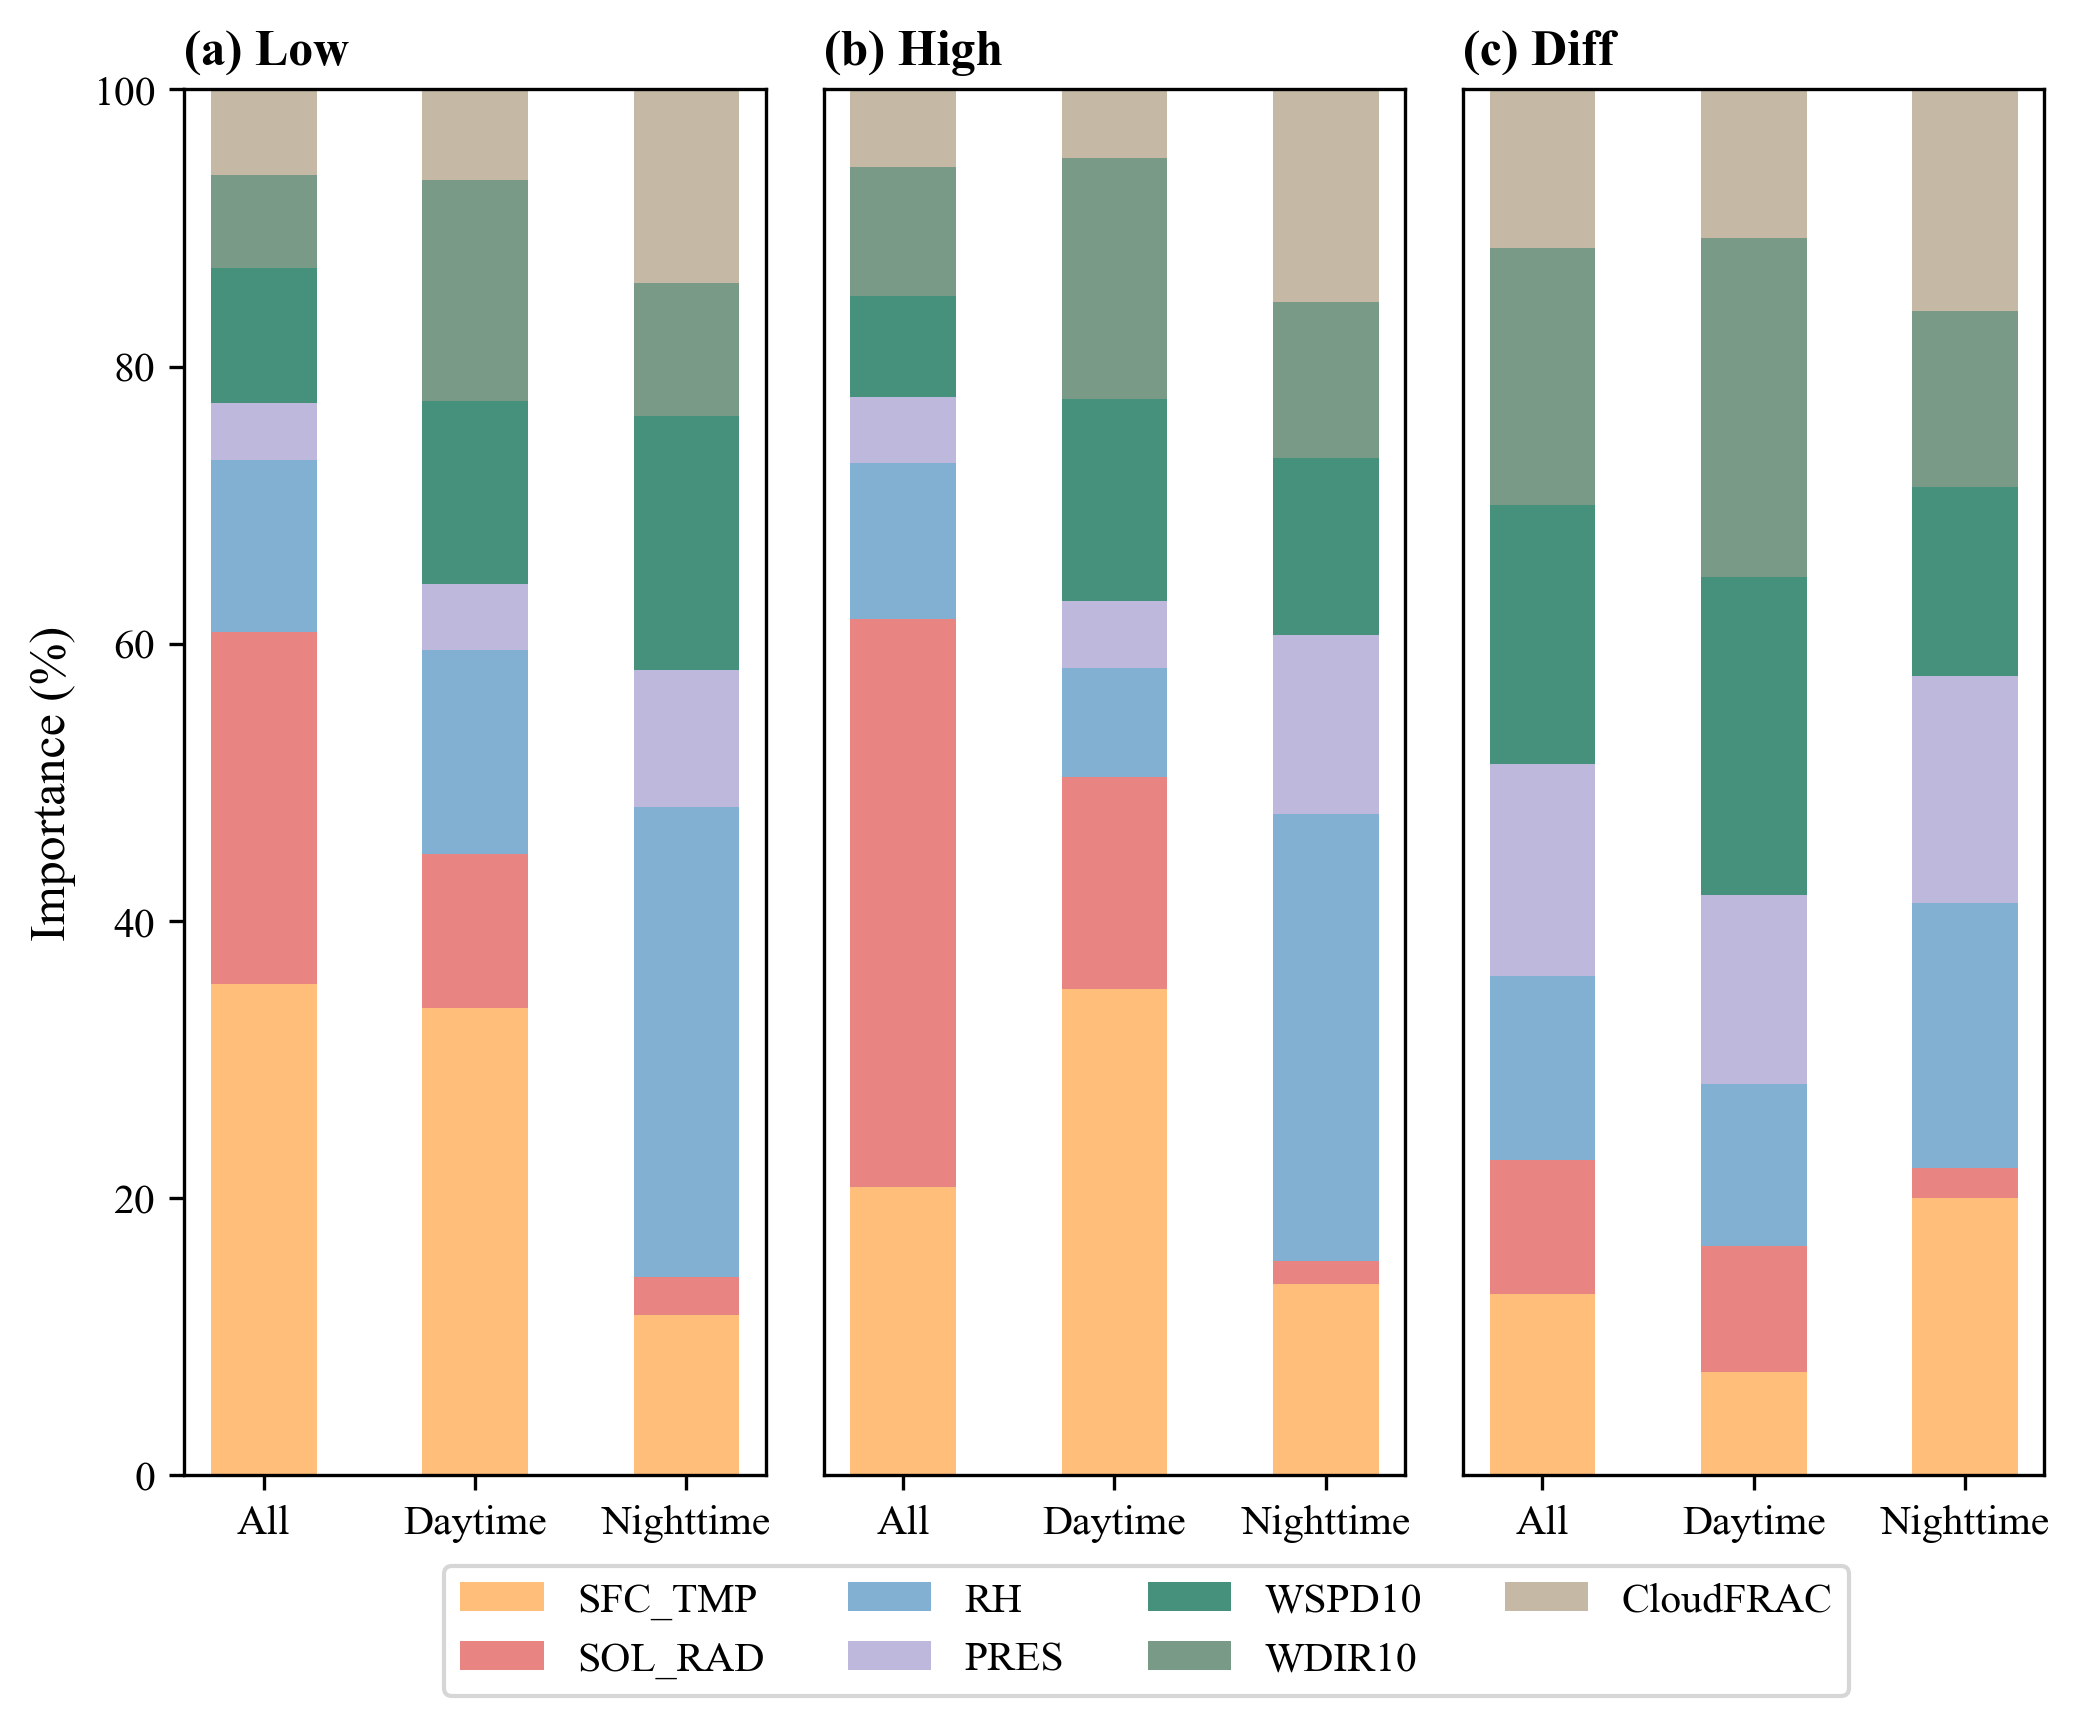

In [67]:
fig = plt.figure(figsize=(8, 6),dpi=300)
ax = fig.subplots(1,3)

col = low.columns
bottom = np.zeros(len(col))
for var in variants:
    ax[0].bar(col, low.loc[var], label=var, bottom=bottom, color=factor_color[var],width=0.5,)
    bottom += low.loc[var]

col = high.columns
bottom = np.zeros(len(col))
for var in variants:
    ax[1].bar(col, high.loc[var], label=var, bottom=bottom, color=factor_color[var],width=0.5,)
    bottom += high.loc[var]

col = diff.columns
bottom = np.zeros(len(col))
for var in variants:
    ax[2].bar(col, diff.loc[var], label=var, bottom=bottom, color=factor_color[var],width=0.5,)
    bottom += diff.loc[var]

ax[0].set_ylim(0,1)
ax[1].set_ylim(0,1)
ax[2].set_ylim(0,1)
ax[0].set_yticks(np.arange(0,1.1,0.2))
ax[0].set_yticklabels(np.arange(0,110,20))
ax[1].set_yticks([])
ax[2].set_yticks([])
ax[0].set_ylabel('Importance (%)',fontsize=12)

title_dict={'fontsize':12,'fontweight':'bold','loc':'left'}
ax[0].set_title('(a) Low',**title_dict)
ax[1].set_title('(b) High',**title_dict)
ax[2].set_title('(c) Diff',**title_dict)
ax[2].legend(bbox_to_anchor=(0.7, -0.05),ncol=4)

plt.subplots_adjust(wspace=0.1)
plt.show()

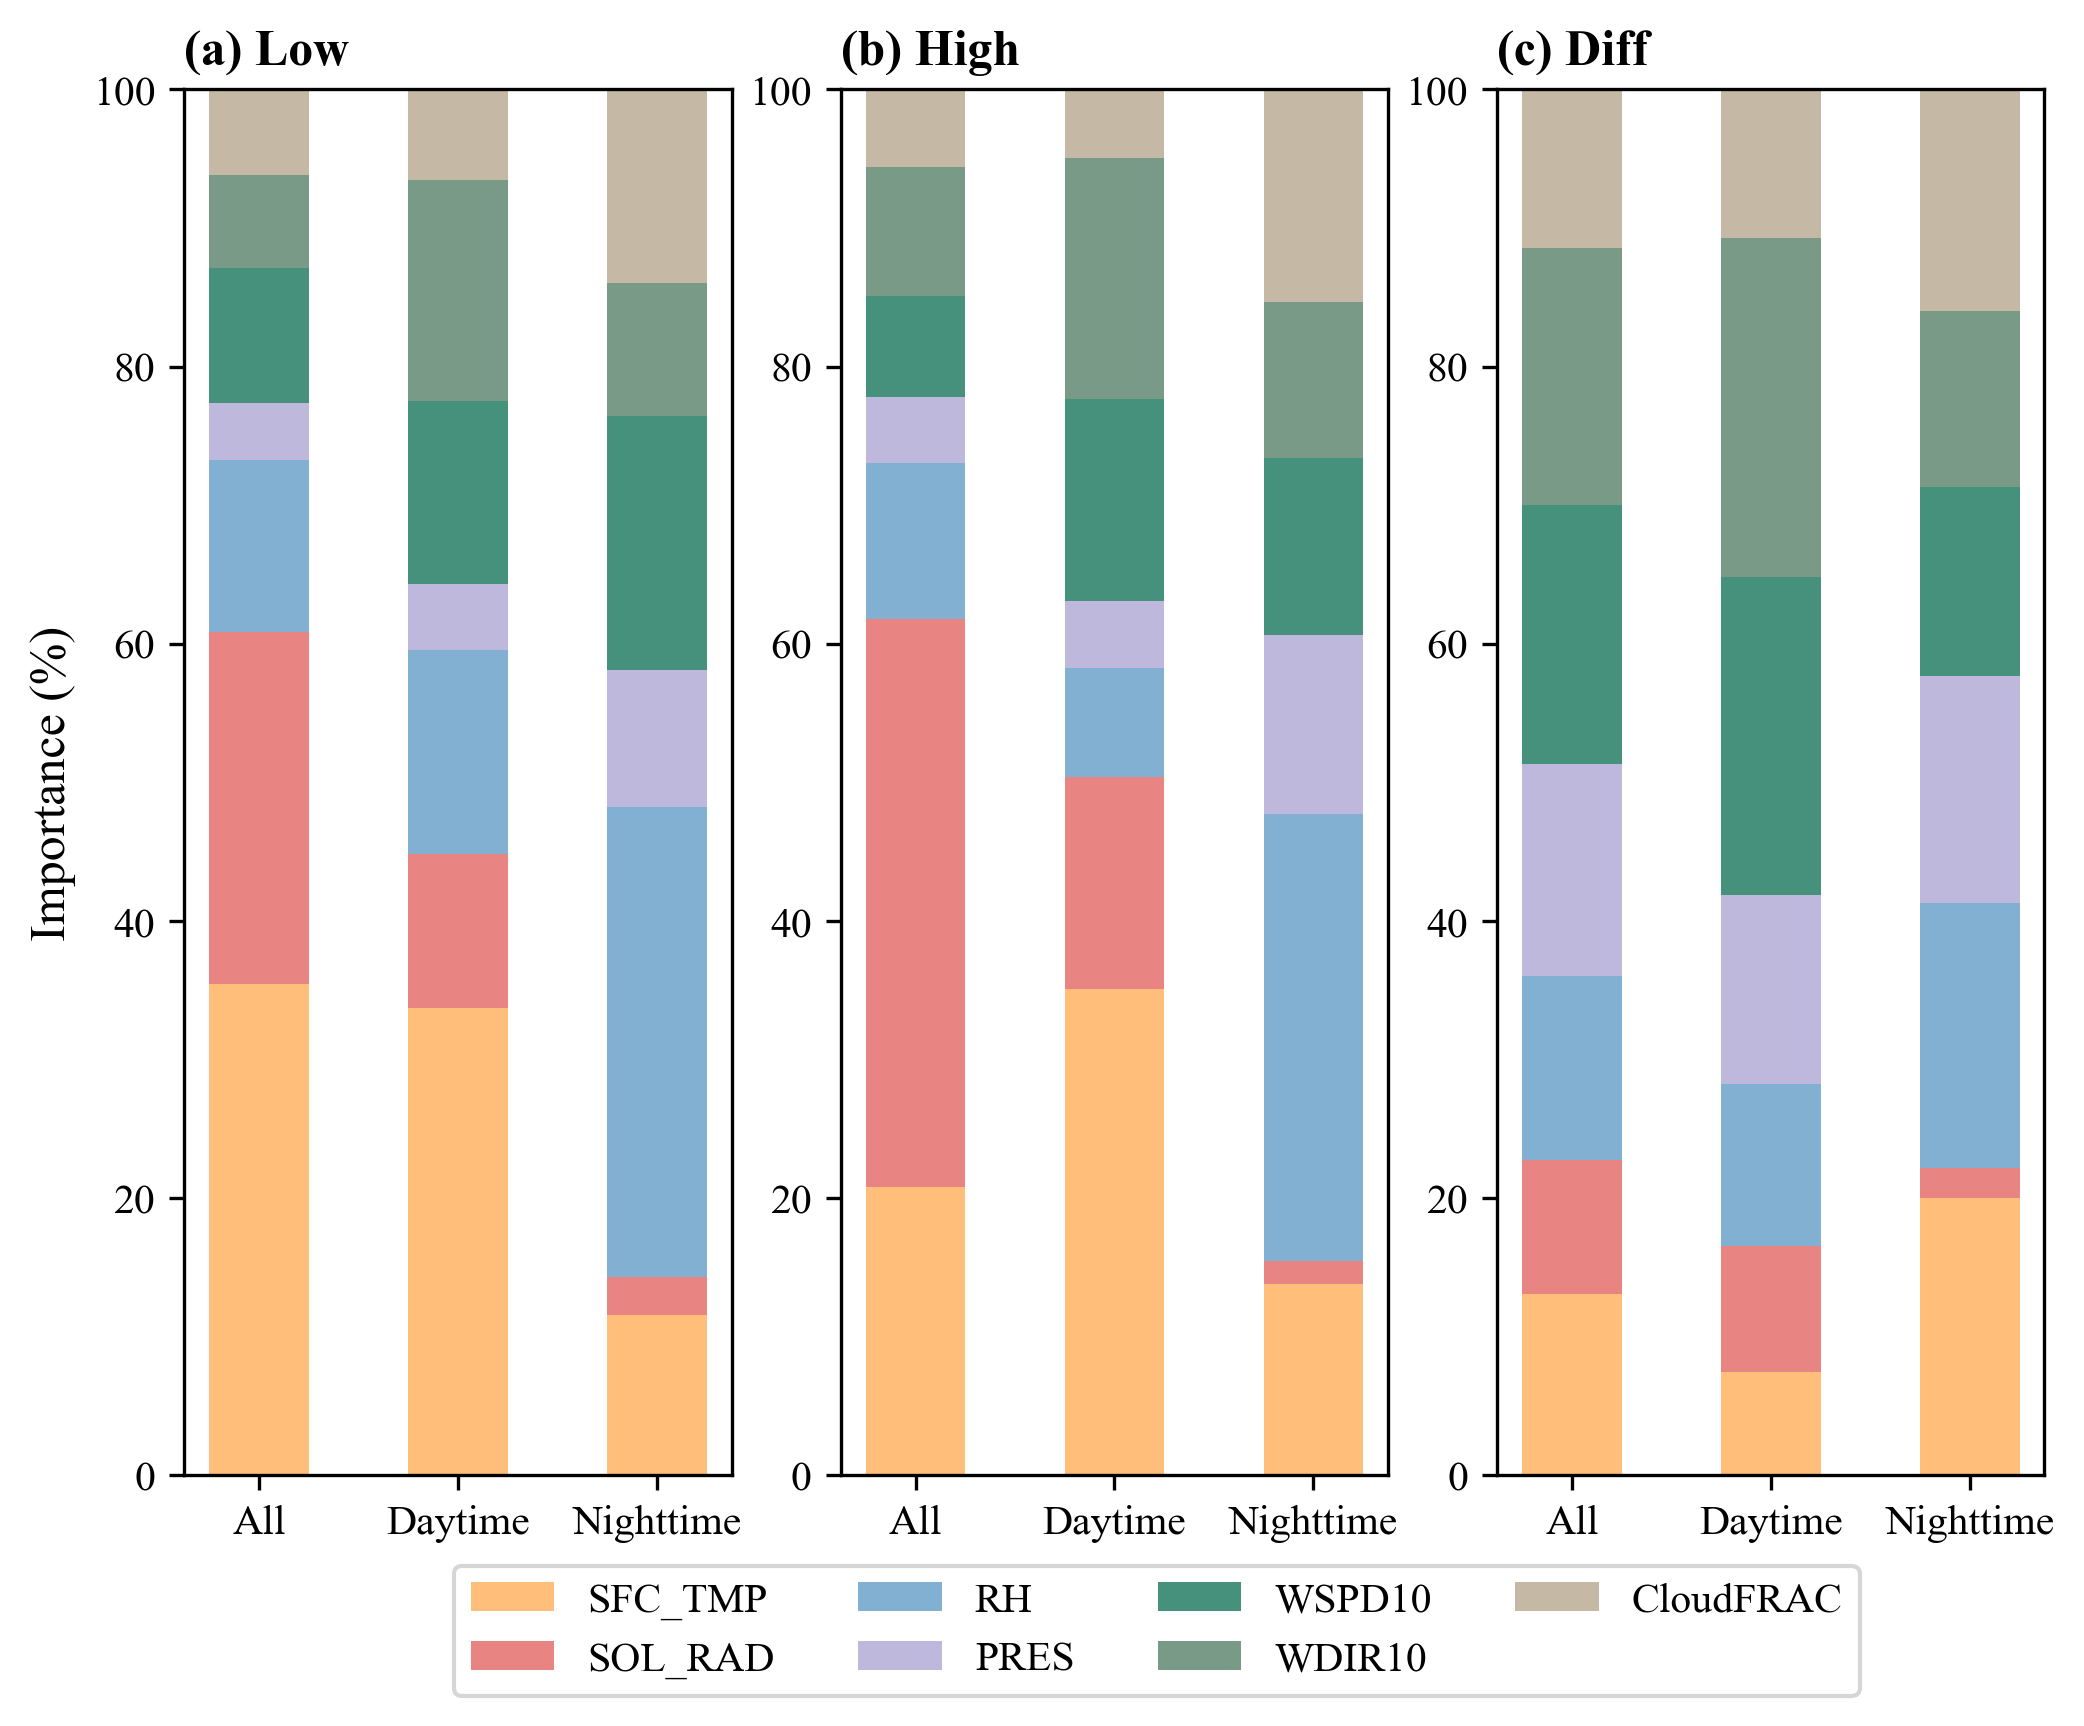

In [65]:
# 创建图表
fig, ax = plt.subplots(1, 3, figsize=(8, 6), dpi=300)

# 循环绘制柱状图
for i, (data, title) in enumerate(zip([low, high, diff], ['(a) Low', '(b) High', '(c) Diff'])):
    col = data.columns
    bottom = np.zeros(len(col))
    for var in factor_color:
        ax[i].bar(col, data.loc[var], label=var, bottom=bottom, color=factor_color[var], width=0.5)
        bottom += data.loc[var]

    ax[i].set_ylim(0, 1)
    ax[i].set_yticks(np.arange(0, 1.1, 0.2))
    ax[i].set_yticklabels(np.arange(0, 110, 20))

    ax[i].set_title(title, fontsize=12, fontweight='bold', loc='left')

# 设置共同的y轴标签
ax[0].set_ylabel('Importance (%)', fontsize=12)

# 设置共同的x轴刻度
ax[0].set_xticks(np.arange(len(col)))
ax[0].set_xticklabels(col)

# 调整legend位置
ax[2].legend(bbox_to_anchor=(0.7, -0.05),ncol=4)

# 显示图表
plt.tight_layout()
plt.show()
